# Pandas Tutorial

#### Author: Charles 
#### Version: 1.0
#### Date: 2018.04.20

In [ ]:
####################
###### Part 1 ######
####################

In [1]:
# import necessary packages
import pandas as pd
from datetime import datetime
import pandas_datareader.data as web

In [2]:
# specify start time and end time 
start_time = datetime(2016,1,1)
end_time = datetime(2016,12,31)

In [3]:
# load stock information from MorningStar database
# this function could have multiple options: google (blocked), yahoo(removed)
df = web.DataReader("AAPL", "morningstar", start_time, end_time)

In [4]:
print(df.head())
print(df.tail(10))

                    Close     High     Low    Open    Volume
Symbol Date                                                 
AAPL   2016-01-01  105.26  105.260  105.26  105.26         0
       2016-01-04  105.35  105.368  102.00  102.61  67649387
       2016-01-05  102.71  105.850  102.41  105.75  55790992
       2016-01-06  100.70  102.370   99.87  100.56  68457388
       2016-01-07   96.45  100.130   96.43   98.68  81094428
                    Close      High     Low    Open    Volume
Symbol Date                                                  
AAPL   2016-12-19  116.64  117.3800  115.75  115.80  27779423
       2016-12-20  116.95  117.5000  116.68  116.74  21424965
       2016-12-21  117.06  117.4000  116.78  116.80  23724084
       2016-12-22  116.29  116.5100  115.64  116.35  26085854
       2016-12-23  116.52  116.5200  115.59  115.59  14249484
       2016-12-26  116.52  116.5200  116.52  116.52         0
       2016-12-27  117.26  117.8000  116.49  116.52  18296855
       2016-12-

In [5]:
# reset index and construct data-frame like a XLS spreadsheet 
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df.drop("Symbol", axis=1, inplace=True)

In [11]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2016-01-01,105.26,105.260,105.26,105.26,0
2016-01-04,105.35,105.368,102.00,102.61,67649387
2016-01-05,102.71,105.850,102.41,105.75,55790992
2016-01-06,100.70,102.370,99.87,100.56,68457388
2016-01-07,96.45,100.130,96.43,98.68,81094428


In [7]:
# plot it 
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

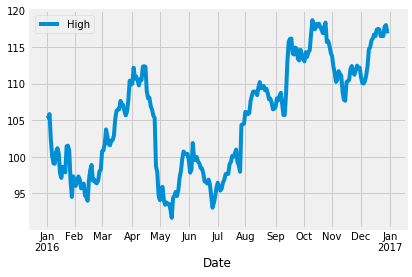

In [8]:
df['High'].plot()
plt.legend()
plt.show()

In [12]:
# how to save data?
# option 1: save as binary pickle
import pickle
fout = open("aapl_stock.pickle", "wb")
pickle.dump(df, fout)

In [13]:
# option 2: use pandas io tools -> pd.to_csv()
df.to_csv("aapl_stock.csv", sep="|")


In [14]:
# how to read them back?
fin = open("aapl_stock.pickle","rb")
df_reload = pickle.load(fin)
df_reload.head()

,Close,High,Low,Open,Volume
Date,,,,,
2016-01-01,105.26,105.260,105.26,105.26,0
2016-01-04,105.35,105.368,102.00,102.61,67649387
2016-01-05,102.71,105.850,102.41,105.75,55790992
2016-01-06,100.70,102.370,99.87,100.56,68457388
2016-01-07,96.45,100.130,96.43,98.68,81094428


In [15]:
df_reload2 = pd.read_csv("aapl_stock.csv",delimiter="|")
df_reload2.head()

,Date,Close,High,Low,Open,Volume
0,2016-01-01,105.26,105.260,105.26,105.26,0
1,2016-01-04,105.35,105.368,102.00,102.61,67649387
2,2016-01-05,102.71,105.850,102.41,105.75,55790992
3,2016-01-06,100.70,102.370,99.87,100.56,68457388
4,2016-01-07,96.45,100.130,96.43,98.68,81094428


In [ ]:
####################
###### Part 2 ######
####################

In [1]:
import pandas as pd

df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

In [2]:
# concatenate, 相当于 stata 中的 append
concat = pd.concat([df1,df2])
print(concat)

      HPI  Int_rate  US_GDP_Thousands
2001   80         2                50
2002   85         3                55
2003   88         2                65
2004   85         2                55
2005   80         2                50
2006   85         3                55
2007   88         2                65
2008   85         2                55


In [3]:
concat = pd.concat([df1,df2,df3])
print(concat)

      HPI  Int_rate  Low_tier_HPI  US_GDP_Thousands
2001   80         2           NaN              50.0
2002   85         3           NaN              55.0
2003   88         2           NaN              65.0
2004   85         2           NaN              55.0
2005   80         2           NaN              50.0
2006   85         3           NaN              55.0
2007   88         2           NaN              65.0
2008   85         2           NaN              55.0
2001   80         2          50.0               NaN
2002   85         3          52.0               NaN
2003   88         2          50.0               NaN
2004   85         2          53.0               NaN


In [4]:
df4 = df1.append(df3)
print(df4)

      HPI  Int_rate  Low_tier_HPI  US_GDP_Thousands
2001   80         2           NaN              50.0
2002   85         3           NaN              55.0
2003   88         2           NaN              65.0
2004   85         2           NaN              55.0
2001   80         2          50.0               NaN
2002   85         3          52.0               NaN
2003   88         2          50.0               NaN
2004   85         2          53.0               NaN


In [5]:
print(pd.merge(df1,df3, on='HPI'))

   HPI  Int_rate_x  US_GDP_Thousands  Int_rate_y  Low_tier_HPI
0   80           2                50           2            50
1   85           3                55           3            52
2   85           3                55           2            53
3   85           2                55           3            52
4   85           2                55           2            53
5   88           2                65           2            50


In [6]:
print(pd.merge(df1,df2, on=['HPI','Int_rate']))

   HPI  Int_rate  US_GDP_Thousands_x  US_GDP_Thousands_y
0   80         2                  50                  50
1   85         3                  55                  55
2   88         2                  65                  65
3   85         2                  55                  55


In [8]:
df1 = pd.DataFrame({
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55],
                    'Year':[2001, 2002, 2003, 2004]
                    })

df3 = pd.DataFrame({
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53],
                    'Year':[2001, 2003, 2004, 2005]})

In [ ]:
'''
Left - equal to left outer join SQL - use keys from left frame only
Right - right outer join from SQL- use keys from right frame only.
Outer - full outer join - use union of keys
Inner - use only intersection of keys.
'''

In [9]:
merged = pd.merge(df1,df3, on='Year', how='left')
merged.set_index('Year', inplace=True)
print(merged)

      Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                        
2001         2                50          50.0           7.0
2002         3                55           NaN           NaN
2003         2                65          52.0           8.0
2004         2                55          50.0           9.0
